In [11]:
%load_ext autoreload
%autoreload 2

from qBN.qBNclass import qBayesNet
from qInference.qInferenceBN import qInfBN

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demo 1: 
### 3 variables, 2 states per variable 

In [12]:
bn1 = gum.fastBN("A->B<-C", 2)
bn1

(pyAgrum.BayesNet<double>@0x5a58af6b7c70) BN{nodes: 3, arcs: 2, domainSize: 8, dim: 6, mem: 96o}

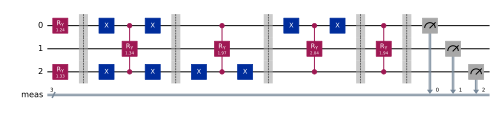

In [13]:
target_nodes_bn1 = None
qbn1 = qBayesNet(bn1, target_nodes_bn1)
qc1 = qbn1.buildCircuit(add_measure=True)
qc1.draw(output="mpl", scale=0.5)

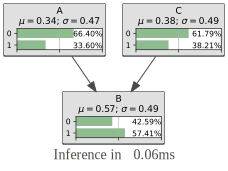

{'A': (pyAgrum.Potential<double>@0x5a58afb68840) 
   A                |
 0        |1        |
 ---------|---------|
  0.6658  | 0.3342  |,
 'B': (pyAgrum.Potential<double>@0x5a58af12ea90) 
   B                |
 0        |1        |
 ---------|---------|
  0.4281  | 0.5718  |,
 'C': (pyAgrum.Potential<double>@0x5a58af5a5670) 
   C                |
 0        |1        |
 ---------|---------|
  0.6184  | 0.3816  |}

In [14]:
gnb.showInference(bn1)
res1 = qbn1.runBN(optimisation_level=3, shots=100000)
res1

In [16]:
ev1 = {"A":1, "C":0}
qInf1 = qInfBN(qbn1)

bn1.cpt("B")

(pyAgrum.Potential<double>@0x5a58af5784d0) 
             ||  B                |
A     |C     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.6141  | 0.3859  |
1     |0     || 0.3034  | 0.6966  |
0     |1     || 0.2753  | 0.7247  |
1     |1     || 0.3198  | 0.6802  |

In [17]:
#runtime ~ 13s
qInf1.rejectionSamplingV1(ev1, verbose=0)

{0: [0, 1.0000000000000007],
 1: [0.2960000000000002, 0.7040000000000005],
 2: [1.0000000000000007, 0]}

In [19]:
%timeit qInf1.rejectionSamplingV1(ev1, verbose=0)

8.83 s ± 519 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
#runtime ~ 40s
qInf1.rejectionSampling(ev1, verbose=0)

In [ ]:
%timeit qInf1.rejectionSampling(ev1, verbose=0)

# Demo 2:
### 3 variables, 5 states  per variable

In [ ]:
bn2 = gum.fastBN("A->B<-C", 5)
bn2

In [ ]:
target_nodes_bn2 = None
qbn2 = qBayesNet(bn2, target_nodes_bn2)
qc2 = qbn2.buildCircuit(add_measure=True)
qc2.draw(output="mpl", scale=0.5)

In [ ]:
gnb.showInference(bn2)
res2 = qbn2.runBN(optimisation_level=3, shots=100000)
res2

In [ ]:
ev2 = {"A":1, "C":0}
qInf2 = qInference(qbn2)

bn2.cpt("B")

In [ ]:
#runtime ~ 4m11s
qInf2.rejectionSamplingV1(ev2, verbose=0)

In [ ]:
#runtime ~ 40m +
#qInf2.rejectionSampling(ev2, verbose=0)

# Demo 3: (Section 4.1)
### 4 variables, 2 states  per variable

In [ ]:
bn3 = gum.fastBN("IR->SM->SP<-OI", 2)
bn3.cpt("IR")[:] = [0.75, 0.25]
bn3.cpt("SM")[:] = [[0.3, 0.7], [0.8, 0.2]]
bn3.cpt("OI")[:] = [0.6,0.4]
bn3.cpt("SP")[:] = [[[0.9, 0.1], [0.5, 0.5]], [[0.4, 0.6], [0.2, 0.8]]]
bn3

In [ ]:
target_nodes_bn3 = None
qbn3 = qBayesNet(bn3, target_nodes_bn3)
qc3 = qbn3.buildCircuit(add_measure=True)
qc3.draw(output="mpl", scale=0.5)

In [ ]:
gnb.showInference(bn3)
res3 = qbn3.runBN(optimisation_level=3, shots=100000)
res3

In [ ]:
ev3 = {"SM": 0, "OI": 0}
qInf3 = qInference(qbn3)

bn3.cpt("SP")

In [ ]:
#runtime ~ 9s
qInf3.rejectionSamplingV1(ev3, verbose=0)

# Demo 4: (Section 4.2)
### 10 variables, 2 states  per variable

In [ ]:
bn4 = gum.fastBN("X6->X7->X8->X5->X3; X8->X9->X1->X10; X9->X4<-X1; X5<-X4->X10; X4->X2->X10", 2)
bn4.cpt("X6")[:] = [0.98, 0.02]
bn4.cpt("X7")[:] = [[0.988, 0.012], [0.429, 0.571]]
bn4.cpt("X8")[:] = [[0.006,0.994], [0.875, 0.125]]
bn4.cpt("X9")[:] = [[0, 1], [0.982, 0.018]]
bn4.cpt("X1")[:] = [[0.448, 0.552], [0.067, 0.933]]
bn4.cpt("X4")[:] = [[[0.151, 0.849], [0.874, 0.126]], [[1, 0], [1, 0]]]
bn4.cpt("X2")[:] = [[0.76, 0.24], [1, 0]]
bn4.cpt("X5")[:] = [[[0, 1], [0, 1]], [[0.723, 0.277], [0.311, 0.689]]]
bn4.cpt("X3")[:] = [[1, 0], [0.949, 0.051]]
bn4.cpt("X10")[:] = [[[[0.684, 0.316], [0, 1]], [[0, 1], [0.474, 0.526]]], [[[1, 0], [0, 1]], [[0.481, 0.519], [1, 0]]]]

gnb.showBN(bn3, size=10)

In [ ]:
target_nodes_bn4 = None
qbn4 = qBayesNet(bn4, target_nodes_bn4)
qc4 = qbn4.buildCircuit(add_measure=True)
qc4.draw(output="mpl", scale=0.5)

In [ ]:
gnb.showInference(bn4, size=10)
res4 = qbn4.runBN(optimisation_level=3, shots=100000)
res4

In [ ]:
qbn4.aerSimulation(qc4, shots=100000)

In [ ]:
ev4 = {"X4": 0, "X2": 0, "X1": 0}
qInf4 = qInference(qbn4)

bn4.cpt("X10")

In [ ]:
bn4.nodeId(bn4.variable("X10"))

In [ ]:
#runtime ~ 3m24s
qInf4.rejectionSamplingV1(ev4, verbose=0)

# Demo 5:
### Demo 4 with nodes X2, X4, X1, X10

In [ ]:
target_nodes_bn5 = {"X2", "X4", "X1", "X10"}
qbn5 = qBayesNet(bn4, target_nodes_bn5)
qc5 = qbn5.buildCircuit(add_measure=True)
qc5.draw(output="mpl", scale=0.5)

In [ ]:
qInf5 = qInference(qbn5)
bn4.cpt("X10")

In [ ]:
#runtime ~ 11s
qInf5.rejectionSamplingV1(ev4, verbose=0)